<a href="https://colab.research.google.com/github/tomohiko-urai/minnano_ai/blob/master/12_MatchTemplate1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# テンプレートマッチング

対象の画像からテンプレート画像を抽出する

<img src="https://storage.googleapis.com/iotcolab2023/020234399.jpg" width="30%" alt="source image"/>

「ソース画像」

<img src="https://storage.googleapis.com/iotcolab2023/template020641652.jpg" alt="source image" />

「テンプレート画像」


In [ ]:
!wget https://storage.googleapis.com/iotcolab2023/020234399.jpg -O a.jpg
!wget https://storage.googleapis.com/iotcolab2023/template020641652.jpg -O b.jpg

--2023-02-11 02:20:14--  https://storage.googleapis.com/iotcolab2023/020234399.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 108.177.11.128, 108.177.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 518263 (506K) [image/jpeg]
Saving to: ‘a.jpg’

a.jpg               100%[===================>] 506.12K  --.-KB/s    in 0.004s  

2023-02-11 02:20:14 (139 MB/s) - ‘a.jpg’ saved [518263/518263]

--2023-02-11 02:20:14--  https://storage.googleapis.com/iotcolab2023/template020641652.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 108.177.11.128, 108.177.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52695 (51K) [image/jpeg]
Saving to: ‘b.jpg’

b.jpg               100%[===================>]  51.46K  --.-KB/s 

In [ ]:
import cv2
import numpy as np
import time

from google.colab.patches import cv2_imshow

CPU = 63.94028663635254/ms
Final result


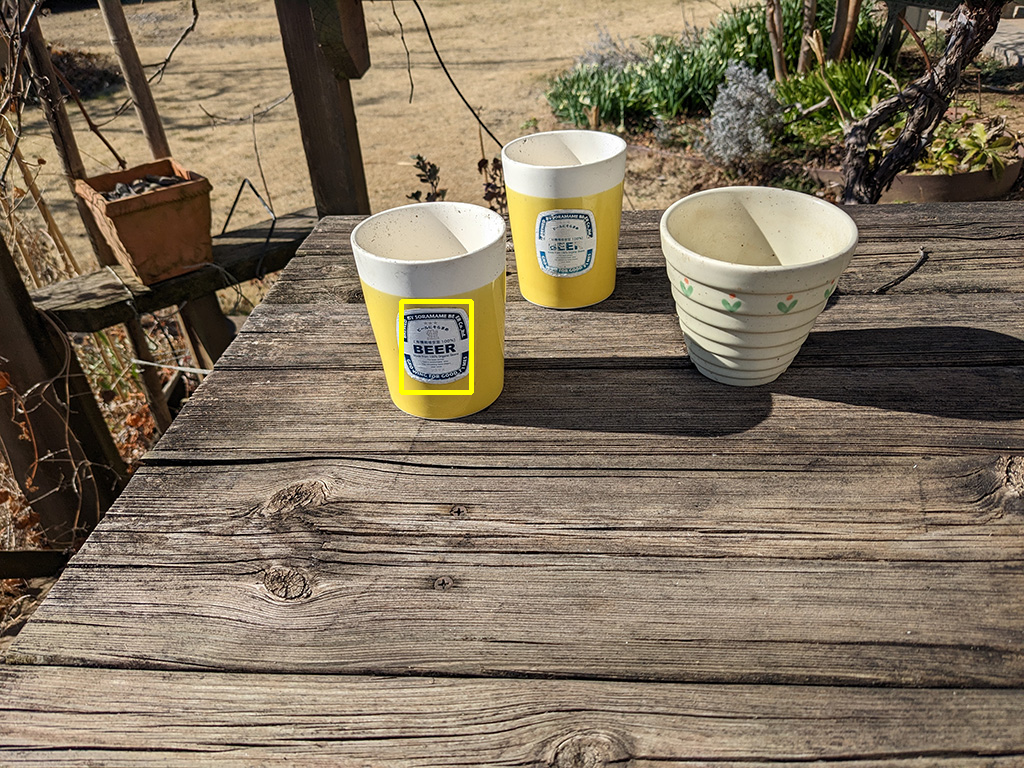

Template


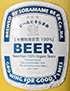

In [ ]:
img = cv2.imread('a.jpg')
temple = cv2.imread('b.jpg')
h, w, _ = temple.shape

timeStart = time.time()

result = cv2.matchTemplate(image=img, templ=temple, method=cv2.TM_CCOEFF)
# result = cv2.matchTemplate(image=img, templ=temple, method=cv2.TM_CCOEFF_NORMED)

timeEnd = time.time()
print("{0} = {1}".format('CPU', (timeEnd - timeStart) * 1000) + "/ms")

# 配列内の最小値と最大値を見つける minLoc=最も信頼度が低い座標 maxLoc=最も信頼度が高い座標
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
x, y = maxLoc
color = np.array([0., 255., 255.])  # BGR表記
cv2.rectangle(img=img, pt1=(x, y), pt2=(x + w, y + h), color=color, thickness=3)

print('Final result')
cv2_imshow(img)
print('Template')
cv2_imshow(temple)